<a href="https://colab.research.google.com/github/melnotte/data-science-specialization/blob/main/online_sales_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PHASE 1

**Project Challenge 1: Online Sales**

The objective of this project is to analyze the results of an event with customers of an online sales company. A dataset was collected containing the customers who spent the most on products during the 5-day sales event, which is its duration. This analysis will identify the customer with the highest purchase this week, who will receive a store prize, and subsequently, can help the company create new strategies to attract more customers.

The database used in this analysis is **online-sales.json**.

In [81]:
import pandas as pd
import json
import numpy as np

In [82]:
data = pd.read_json('online-sales.json')
data

,dados_vendas
0,"{'Data de venda': '06/06/2022', 'Cliente': ['@..."
1,"{'Data de venda': '07/06/2022', 'Cliente': ['I..."
2,"{'Data de venda': '08/06/2022', 'Cliente': ['I..."
3,"{'Data de venda': '09/06/2022', 'Cliente': ['J..."
4,"{'Data de venda': '10/06/2022', 'Cliente': ['M..."


In [83]:
data = pd.json_normalize(data['dados_vendas'])

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Data de venda    5 non-null      object
 1   Cliente          5 non-null      object
 2   Valor da compra  5 non-null      object
dtypes: object(3)
memory usage: 252.0+ bytes


In [85]:
data

,Data de venda,Cliente,Valor da compra
0,06/06/2022,"[@ANA _LUCIA 321, DieGO ARMANDIU 210, DieGO AR...","[R$ 836,5, R$ 573,33, R$ 392,8, R$ 512,34]"
1,07/06/2022,"[Isabely JOanes 738, Isabely JOanes 738, Isabe...","[R$ 825,31, R$ 168,07, R$ 339,18, R$ 314,69]"
2,08/06/2022,"[Isabely JOanes 738, JOãO Gabriel 671, Julya m...","[R$ 682,05, R$ 386,34, R$ 622,65, R$ 630,79]"
3,09/06/2022,"[Julya meireles 914, MaRIA Julia 444, MaRIA Ju...","[R$ 390,3, R$ 759,16, R$ 334,47, R$ 678,78]"
4,10/06/2022,"[MaRIA Julia 444, PEDRO PASCO 812, Paulo castr...","[R$ 314,24, R$ 311,15, R$ 899,16, R$ 885,24]"


# PHASE 2

> **Objectives:**

* Eliminate data in lists within the DataFrame
* Verify data types
* Identify numerical columns
* Transform the numerical column to a numeric type

In [86]:
columns = list(data.columns)
columns

['Data de venda', 'Cliente', 'Valor da compra']

In [87]:
data = data.explode(columns[1:])
data

,Data de venda,Cliente,Valor da compra
0,06/06/2022,@ANA _LUCIA 321,"R$ 836,5"
0,06/06/2022,DieGO ARMANDIU 210,"R$ 573,33"
0,06/06/2022,DieGO ARMANDIU 210,"R$ 392,8"
0,06/06/2022,DieGO ARMANDIU 210,"R$ 512,34"
1,07/06/2022,Isabely JOanes 738,"R$ 825,31"
1,07/06/2022,Isabely JOanes 738,"R$ 168,07"
1,07/06/2022,Isabely JOanes 738,"R$ 339,18"
1,07/06/2022,Isabely JOanes 738,"R$ 314,69"
2,08/06/2022,Isabely JOanes 738,"R$ 682,05"
2,08/06/2022,JOãO Gabriel 671,"R$ 386,34"


In [88]:
data.reset_index(inplace=True, drop=True)
data

,Data de venda,Cliente,Valor da compra
0,06/06/2022,@ANA _LUCIA 321,"R$ 836,5"
1,06/06/2022,DieGO ARMANDIU 210,"R$ 573,33"
2,06/06/2022,DieGO ARMANDIU 210,"R$ 392,8"
3,06/06/2022,DieGO ARMANDIU 210,"R$ 512,34"
4,07/06/2022,Isabely JOanes 738,"R$ 825,31"
5,07/06/2022,Isabely JOanes 738,"R$ 168,07"
6,07/06/2022,Isabely JOanes 738,"R$ 339,18"
7,07/06/2022,Isabely JOanes 738,"R$ 314,69"
8,08/06/2022,Isabely JOanes 738,"R$ 682,05"
9,08/06/2022,JOãO Gabriel 671,"R$ 386,34"


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Data de venda    20 non-null     object
 1   Cliente          20 non-null     object
 2   Valor da compra  20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


In [90]:
data['Valor da compra'] = data['Valor da compra'].apply(lambda x: x.replace('R$','').replace(',','.').strip())
data['Valor da compra']

,Valor da compra
0,836.5
1,573.33
2,392.8
3,512.34
4,825.31
5,168.07
6,339.18
7,314.69
8,682.05
9,386.34


In [91]:
data['Valor da compra'] = data['Valor da compra'].astype(np.float64)

# PHASE 3



> **Objective:**


* Manipulate the text in the 'Cliente' (Client) column so that the result is the client names in lowercase, without special characters or numbers.

In [92]:
data['Cliente'] = data['Cliente'].str.lower()
data['Cliente'].head()

,Cliente
0,@ana _lucia 321
1,diego armandiu 210
2,diego armandiu 210
3,diego armandiu 210
4,isabely joanes 738


In [93]:
data['Cliente'] = data['Cliente'].str.replace(r'[^a-záéíóúâêôãõç]',' ',regex=True)
data['Cliente'].head(10)

,Cliente
0,ana lucia
1,diego armandiu
2,diego armandiu
3,diego armandiu
4,isabely joanes
5,isabely joanes
6,isabely joanes
7,isabely joanes
8,isabely joanes
9,joão gabriel


# PHASE 4

> **Objective:**

* In the 'Fecha de venta' (Sale Date) column, we have dates in the 'day/month/year' (dd/mm/YYYY) format. Transform this data to the datetime type and find a way to visualize a subset that can contribute to the objective of the context in which the data is inserted.

In [94]:
data['Data de venda'] = pd.to_datetime(data['Data de venda'], format='%d/%m/%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Data de venda    20 non-null     datetime64[ns]
 1   Cliente          20 non-null     object        
 2   Valor da compra  20 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 612.0+ bytes


In [95]:
subset = data.groupby('Cliente')['Valor da compra'].sum().sort_values(ascending=False)
subset

,Valor da compra
Cliente,
isabely joanes,2329.30
maria julia,2086.65
julya meireles,1643.74
diego armandiu,1478.47
paulo castro,899.16
thiago fritzz,885.24
ana lucia,836.50
joão gabriel,386.34
pedro pasco,311.15


In [96]:
import matplotlib.pyplot as plt

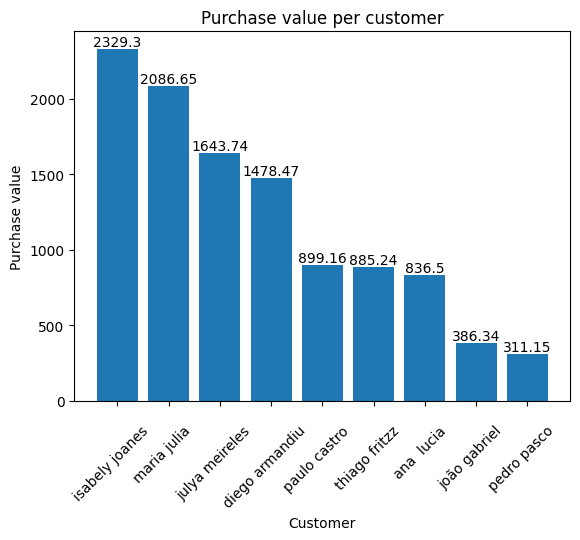

In [97]:
bars = plt.bar(subset.index, subset)
plt.bar_label(bars)
plt.xticks(rotation=45)
plt.xlabel('Customer')
plt.ylabel('Purchase value')
plt.title('Purchase value per customer')
plt.show()